In [1]:
import numpy
import math
from scipy.interpolate import UnivariateSpline
import scipy.optimize as opt
from scipy.optimize import fsolve
from scipy import signal
from scipy import ndimage
import pandas
from posixpath import join as ppjoin
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def read_specral_resonse(store, pth):
    df = store[pth]
    sf = store.get_storer(pth).attrs.scale_factor
    res = df.filter(regex='Wavelength*') * sf
    for col in res.columns:
        df[col] = res[col]
    return df

In [3]:
store = pandas.HDFStore('spectral-responses-v2.h5', 'r')

In [4]:
platforms = store.root.__members__
print platforms

['terra', 'sentinel_2a', 'himawari8']


In [5]:
for platform in platforms:
    node = store.get_node(platform)
    sensors = node.__members__
    print "Number of sensors for {}: {}".format(platform, len(sensors))
    for sensor in sensors:
        node2 = store.get_node(ppjoin(platform, sensor))
        bands = node2.__members__
        print "Number of bands in {}: {}".format(sensor, len(bands))

Number of sensors for terra: 4
Number of bands in modis: 36
Number of bands in astervnir: 4
Number of bands in astertir: 5
Number of bands in asterswir: 6
Number of sensors for sentinel_2a: 1
Number of bands in msi: 13
Number of sensors for himawari8: 1
Number of bands in ahi: 16


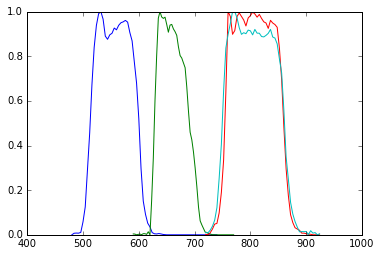

In [6]:
pth = ppjoin('terra', 'astervnir')
node = store.get_node(pth)
bands = len(node.__members__)
for i in range(1, bands + 1):
    bname = 'Band{}'.format(i)
    wname = 'Wavelength{}'.format(i)
    pth_name = ppjoin(pth, bname)
    df = read_specral_resonse(store, pth_name)
    plot(df[wname].values, df[bname].values)

In [7]:
store.close()